In [1]:
import os
import sys
import pandas as pd
import numpy as np
import glob

In [14]:
datafolder = "/raid/dongwoolee/real-colon-dataset/Richard/data"
lesion_info = pd.read_csv(os.path.join(datafolder, "lesion_info_Olympus.csv"))
video_info = pd.read_csv(os.path.join(datafolder, "video_info.csv"))
frames_polyps = pd.read_csv(os.path.join(datafolder, "frames_polyps.csv"))

display(frames_polyps[frames_polyps["is_polyps_frame"] == 1])

,video_id,frame_id,is_polyps_frame
22953,001-001,22953,1
22954,001-001,22954,1
22955,001-001,22955,1
22956,001-001,22956,1
22957,001-001,22957,1
...,...,...,...
2521600,004-015,52624,1
2521601,004-015,52625,1
2521602,004-015,52626,1
2521603,004-015,52627,1


In [20]:
frames_train = pd.read_csv(os.path.join(datafolder, "frames_train.csv"))
frames_test = pd.read_csv(os.path.join(datafolder, "frames_test.csv"))

grouped_frames = frames_test.groupby("video_id")
for vid, group in grouped_frames:
    pos_group = group[group["is_polyps_frame"]==1]
    neg_group = group[group["is_polyps_frame"]==0]
    print(f"{vid}: {len(group)}, {len(pos_group)}, {len(neg_group)}")

001-001: 45465, 6190, 39275
001-004: 45663, 5244, 40419
001-008: 35740, 0, 35740
001-013: 22418, 0, 22418
002-002: 24969, 5132, 19837
002-007: 50299, 12411, 37888
002-010: 25898, 4408, 21490
003-002: 50601, 6291, 44310
003-013: 73670, 14686, 58984
004-001: 25516, 3298, 22218
004-007: 29108, 0, 29108
004-011: 48470, 2781, 45689


In [ ]:
pos_frames = frames_polyps[frames_polyps["is_polyps_frame"] == 1]
print(len(pos_frames))
pos_frame_per_group = []
for vid, group in pos_frames.groupby("video_id"):
    pos_frame_per_group.append(len(group))
print(pos_frame_per_group)

313273
[6190, 5598, 5244, 2996, 12130, 7057, 7714, 3318, 1255, 5132, 16239, 5469, 6443, 12411, 4408, 9041, 8640, 6291, 21286, 9398, 13681, 9055, 1170, 9109, 3765, 2680, 11778, 14686, 4317, 7889, 3298, 8735, 4499, 3401, 3437, 1422, 2800, 2781, 3592, 23201, 7965, 13752]


(1352, 1080)


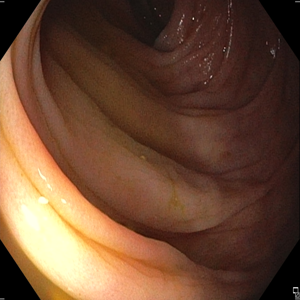

In [1]:
from PIL import Image
import os

data_basepath = "/radraid/dongwoolee/real_colon_data"

def get_frame(basepath, video_id, frame_id):
    frames_dir = os.path.join(basepath, (video_id + "_frames"))
    frame_path = os.path.join(frames_dir, (video_id + "_" + frame_id + ".jpg"))
    return frame_path

def get_annotation(basepath, video_id, frame_id):
    annot_dir = os.path.join(basepath, (video_id + "_annotations"))
    annot_path = os.path.join(annot_dir, (video_id + "_" + frame_id + ".xml"))
    return annot_path

video_id = "001-001"
frame_id = "22957"
framepath = get_frame(data_basepath, video_id, frame_id)
annotpath = get_annotation(data_basepath, video_id, frame_id)

image = Image.open(framepath)
print(image.size)
image = image.resize((300,300))
image.show()

In [4]:
img_0 = pd.read_csv("img_sizes_0.csv")

img_1 = pd.read_csv("img_sizes_1.csv")

In [ ]:
import os

def get_first_items(parent_dir, sort_items=True):
    first_items = {}
    # Iterate over all entries in the parent directory.
    for entry in os.listdir(parent_dir):
        full_path = os.path.join(parent_dir, entry)
        if os.path.isdir(full_path):
            # List the items in this subdirectory.
            items = os.listdir(full_path)
            if sort_items:
                items.sort()
            # Only add if there is at least one item.
            if items:
                first_items[entry] = items[0]
    return first_items

# Example usage:
parent_directory = "/radraid/dongwoolee/real_colon_data"
first_items = get_first_items(parent_directory)
for subdir, first_item in first_items.items():
    if first_item.endswith(".jpg"):
        print(f"{subdir}: {first_item}")

SyntaxError: expected ':' (158076464.py, line 22)

In [10]:
import os

directory = "/radraid/dongwoolee/real_colon_data/001-012_annotations"

for filename in os.listdir(directory):
    if filename.endswith(".0.xml"):
        new_filename = filename.replace(".0.xml", ".xml")
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed {filename} to {new_filename}")

Renamed 001-012_728.0.xml to 001-012_728.xml
Renamed 001-012_25579.0.xml to 001-012_25579.xml
Renamed 001-012_2557.0.xml to 001-012_2557.xml
Renamed 001-012_26094.0.xml to 001-012_26094.xml
Renamed 001-012_32201.0.xml to 001-012_32201.xml
Renamed 001-012_11648.0.xml to 001-012_11648.xml
Renamed 001-012_37481.0.xml to 001-012_37481.xml
Renamed 001-012_11832.0.xml to 001-012_11832.xml
Renamed 001-012_30412.0.xml to 001-012_30412.xml
Renamed 001-012_35310.0.xml to 001-012_35310.xml
Renamed 001-012_17670.0.xml to 001-012_17670.xml
Renamed 001-012_4240.0.xml to 001-012_4240.xml
Renamed 001-012_34121.0.xml to 001-012_34121.xml
Renamed 001-012_33928.0.xml to 001-012_33928.xml
Renamed 001-012_25283.0.xml to 001-012_25283.xml
Renamed 001-012_4320.0.xml to 001-012_4320.xml
Renamed 001-012_18179.0.xml to 001-012_18179.xml
Renamed 001-012_7367.0.xml to 001-012_7367.xml
Renamed 001-012_708.0.xml to 001-012_708.xml
Renamed 001-012_17300.0.xml to 001-012_17300.xml
Renamed 001-012_3368.0.xml to 001-01

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV that contains frame-level metadata.
frames_data = pd.read_csv("/raid/dongwoolee/real-colon-dataset/Richard/data/frames_polyps.csv")

# Group by video_id to compute per-video statistics.
video_stats = frames_data.groupby("video_id").agg(
    num_total_frames=("frame_id", "count"),
    num_positive_frames=("is_polyps_frame", "sum")
).reset_index()
video_stats["num_negative_frames"] = video_stats["num_total_frames"] - video_stats["num_positive_frames"]

# Separate videos into two groups.
# Group A: Videos with at least one positive frame.
videos_with_pos = video_stats[video_stats["num_positive_frames"] > 0]
# Group B: Videos with only negative frames.
videos_only_neg = video_stats[video_stats["num_positive_frames"] == 0]

# Perform an 80:20 train-test split on each group.
train_videos_with_pos, test_videos_with_pos = train_test_split(videos_with_pos, test_size=0.2, random_state=2) 
train_videos_only_neg, test_videos_only_neg = train_test_split(videos_only_neg, test_size=0.2, random_state=2)

# Combine the video IDs from the two splits.
train_video_ids = set(train_videos_with_pos["video_id"]).union(set(train_videos_only_neg["video_id"]))
test_video_ids  = set(test_videos_with_pos["video_id"]).union(set(test_videos_only_neg["video_id"]))

# Now, create train and test sets from the original frames_data.
train_data = frames_data[frames_data["video_id"].isin(train_video_ids)]
test_data  = frames_data[frames_data["video_id"].isin(test_video_ids)]

train_data.to_csv("/raid/dongwoolee/real-colon-dataset/Richard/data/frames_train.csv")
test_data.to_csv("/raid/dongwoolee/real-colon-dataset/Richard/data/frames_test.csv")

# Optionally, check the positive ratio in both splits.
train_pos_ratio = train_data["is_polyps_frame"].mean()
test_pos_ratio  = test_data["is_polyps_frame"].mean()

print("Train positive ratio:", train_pos_ratio)
print("Test positive ratio:", test_pos_ratio)

# Additionally, you can compare total frame counts per split if desired.
print("Train total frames:", len(train_data))
print("Test total frames:", len(test_data))

print(train_data["video_id"].unique())
print(test_data["video_id"].unique())

Train positive ratio: 0.12358388978963582
Test positive ratio: 0.12649403432694944
Train total frames: 2045833
Test total frames: 477817
['001-002' '001-003' '001-005' '001-006' '001-007' '001-009' '001-010'
 '001-011' '001-012' '001-014' '001-015' '002-001' '002-003' '002-004'
 '002-005' '002-014' '003-001' '003-003' '003-004' '003-005' '003-006'
 '003-007' '003-008' '003-009' '003-010' '003-011' '003-012' '003-014'
 '003-015' '004-002' '004-003' '004-004' '004-005' '004-006' '004-008'
 '004-009' '004-010' '004-012' '004-013' '004-014' '004-015']
['001-001' '001-004' '001-008' '001-013' '002-002' '002-007' '002-010'
 '003-002' '003-013' '004-001' '004-007' '004-011']
